In [2]:
import csv
import jieba

# 用户评论数据集
ds_comments = []

# 1. Read the CSV file
with open('/mnt/data_1/zfy/4/week7/homework/homework1/DMSC.csv', 'r') as file:
    reader = csv.DictReader(file)
    for idx, row in enumerate(reader):
        if idx >= 30000:  # 只处理前 10,000 行
            break
        star = int(row['Star'])
        words = jieba.lcut(row['Comment']) 
        if star in range(1, 3):  # 星级 1-2 为负面
            ds_comments.append((words, 0))  # 0 表示负面
        elif star in range(4, 6):  # 星级 4-5 为正面
            ds_comments.append((words, 1))  # 1 表示正面
        else:  # 星级 3 忽略
            continue

len(ds_comments)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.827 seconds.
Prefix dict has been built successfully.


16571

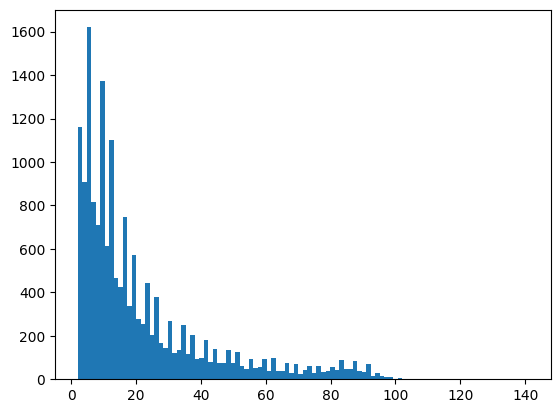

In [3]:
import matplotlib.pyplot as plt

comments_len = [len(c) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

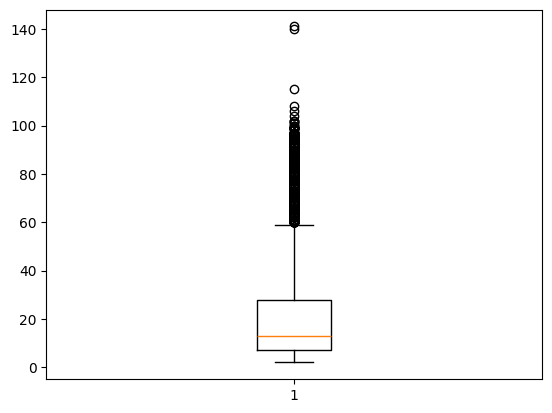

In [4]:
plt.boxplot(comments_len)
plt.show

In [5]:

ds_comments = [c for c in ds_comments if len(c[0]) in range(10, 120)]
print(len(ds_comments))


10649


In [6]:
import pickle

with open('/mnt/data_1/zfy/4/week7/homework/homework1/comments.pkl', 'wb') as f:
    pickle.dump(ds_comments, f)